In [2]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc
import scipy.ndimage as ndi

from deep.datasets import imageutl as imutl
from deep.datasets import utility as utl
from deep import visualization as view


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Load dataset

In [3]:
def summary(x):
    print( np.min(x), np.max(x), x.shape )

def imageshowlist(image_in, image_out):
    plt.figure( figsize=(16,16))
    plt.subplot(121)
    plt.imshow( image_in )
    plt.axis('off')
    plt.subplot(122)
    plt.imshow( image_out )
    plt.axis('off')
    
def tolabel(mask):
    labeled, nr_true = ndi.label(mask)
    return labeled

def decompose(labeled):
    nr_true = labeled.max()
    masks = []
    for i in range(1, nr_true + 1):
        msk = labeled.copy()
        msk[msk != i] = 0.
        msk[msk == i] = 255.
        masks.append(msk)
    if not masks: return np.array([labeled])
    else: return np.array(masks)

In [4]:
pathdataset     = '../db/dbselect'
namedataset     = 'nc001'
sub_folder      =  ''
folders_images  = 'images'
folders_labels  = 'labels'


pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.nucleiProvide.create(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    )

print(len(dataloader))
print(':)!!!')

18
:)!!!


0 255 (590, 385, 3)
0 255 (590, 385)
000005
[  0 128 255]


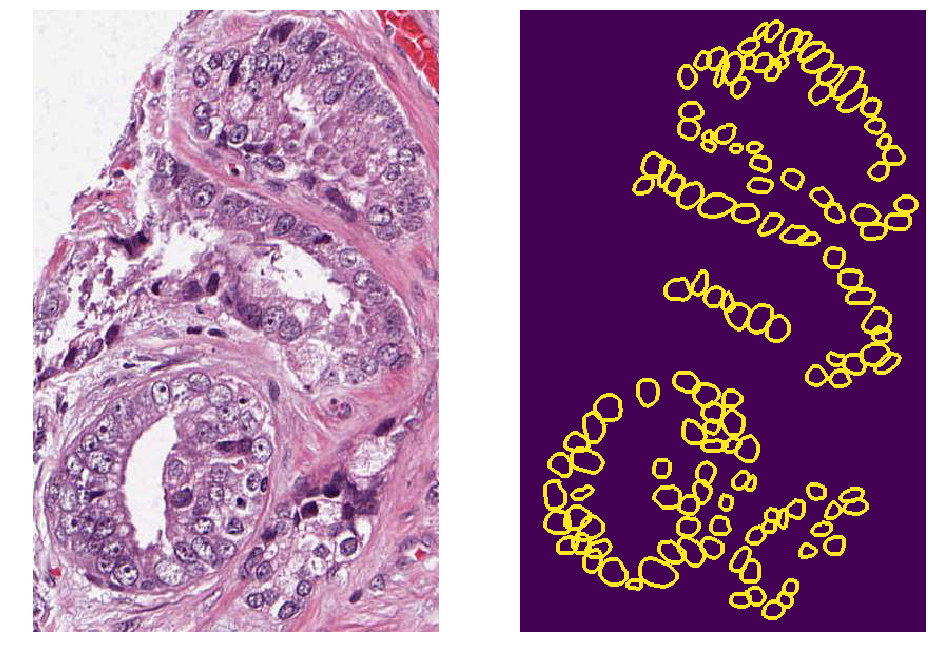

In [13]:
image, label = dataloader[ 4 ]
summary(image)
summary(label)
print( dataloader.getid() )
print( np.unique(label) )

imageshowlist( image, label==128 )

000005


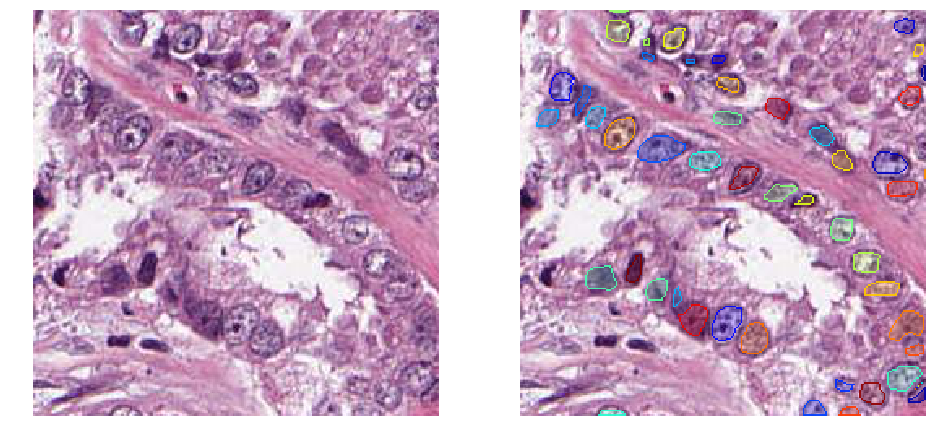

In [12]:
i = 4
image, label = dataloader[ i ] #np.random.randint( len(dataloader) )

ini = 100
image = image[ini:ini+250,ini:ini+250,:]
label = label[ini:ini+250,ini:ini+250]

label = decompose(tolabel(label>128)).transpose( (1,2,0) )

label = label[:,:, np.random.permutation(label.shape[2]) ]
label = view.makeimagecell(image, label, alphaback=0.2, alphaedge=0.9)

print( dataloader.getid() )
imageshowlist(image, label)